In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LG_data/DESAFIO04/product_quality_dataset.csv')
data.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0,84


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Power Consumption (kW)  1000 non-null   float64
 1   Cooling Capacity (BTU)  1000 non-null   int64  
 2   Noise Level (dB)        1000 non-null   float64
 3   EER                     1000 non-null   float64
 4   Temperature Range (°C)  1000 non-null   int64  
 5   Airflow (m³/min)        1000 non-null   float64
 6   Warranty (Years)        1000 non-null   int64  
 7   Build Quality Rating    1000 non-null   int64  
 8   Maintenance Cost ($)    1000 non-null   int64  
 9   Type                    1000 non-null   int64  
 10  Efficiency Score        1000 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


In [ ]:
X = data.drop('Type', axis=1)
y = data['Type']

Divisão 80:20:20

In [ ]:
# Divisão inicial: 80% para treino+validação, 20% para teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Divisão secundária: 80% do treino+validação para treino, 20% para validação
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

# Definindo o modelo SVM
model = SVC(
    kernel='rbf',          # Tipo de kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,                 # Parâmetro de regularização
    gamma='scale',         # Coeficiente do kernel (aplicável a 'rbf', 'poly' e 'sigmoid')
    random_state=42        # Define o estado aleatório
)

# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)


# Cálculo da acurácia
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy = accuracy_score(y_test, y_pred)

# Impressão dos resultados
print("Acurácia (Treino):", accuracy_train)
print("Acurácia (Validação):", accuracy_val)
print("Acurácia (Teste):", accuracy)

Acurácia (Treino): 0.5265625
Acurácia (Validação): 0.50625
Acurácia (Teste): 0.46


In [ ]:
# Cross-validation com 5 folds
scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='accuracy')

# Resultados
print("Acurácias dos folds:", scores)
print("Acurácia média (5 folds):", np.mean(scores))

Acurácias dos folds: [0.51875 0.51875 0.475   0.50625 0.5    ]
Acurácia média (5 folds): 0.50375


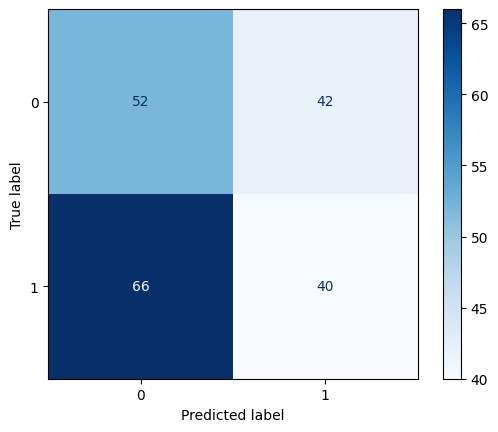

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusão para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


Divisão 70:30:30

In [ ]:
# Divisão inicial: 70% para treino, 30% para validação+teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Divisão secundária: 50% dos 30% restantes para validação, 50% para teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=0)


# Definindo o modelo SVM
model = SVC(
    kernel='rbf',          # Tipo de kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,                 # Parâmetro de regularização
    gamma='scale',         # Coeficiente do kernel (aplicável a 'rbf', 'poly' e 'sigmoid')
    random_state=42        # Define o estado aleatório
)

# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)

# Cálculo da acurácia
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy = accuracy_score(y_test, y_pred)

# Impressão dos resultados
print("Acurácia (Treino):", accuracy_train)
print("Acurácia (Validação):", accuracy_val)
print("Acurácia (Teste):", accuracy)

Acurácia (Treino): 0.5242857142857142
Acurácia (Validação): 0.49523809523809526
Acurácia (Teste): 0.4222222222222222


In [ ]:
# Cross-validation com 5 folds
scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='accuracy')

# Resultados
print("Acurácias dos folds:", scores)
print("Acurácia média (5 folds):", np.mean(scores))

Acurácias dos folds: [0.51875 0.51875 0.475   0.50625 0.5    ]
Acurácia média (5 folds): 0.50375


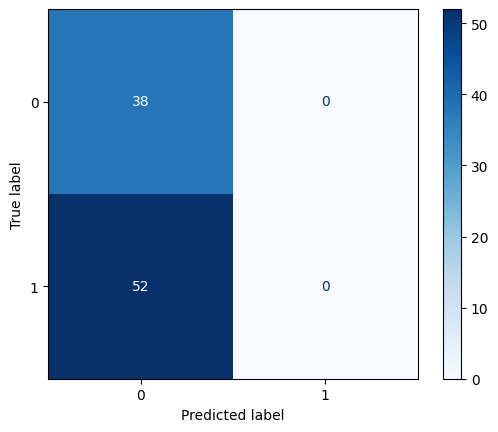

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusão para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')